In [1]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [2]:
audio_data = 'file.wav'
y, sr = librosa.load(audio_data)
print(type(y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


y - представлен как одномерный массив numpy.

sr - содержит частоту дискретизации y, то есть количество отсчетов звука в секунду.

Частота дискретизации (Sample Rate) - это количество аудио сэмпла, передаваемых в секунду, которое измеряется в Гц или кГц (число выборок аудиосигнала, приходящихся на секунду).

In [ ]:
print(y.shape, sr)

(134946,) 22050


## Визуализация

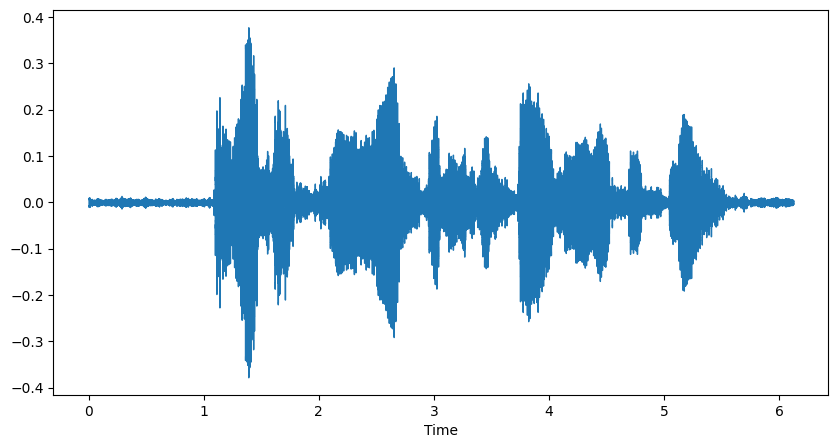

In [ ]:
import IPython.display as ipd
plt.figure(figsize=(10,5))
librosa.display.waveshow(y,sr=sr)
ipd.Audio(audio_data)

## Разделение гармонических (тональных ) и ударных (переходных) сигналов на две формы волны:

HPSS (Harmonic-Percussive Source Separation) - librosa.effects.hpss(y)

Text(0.5, 1.0, 'Harmonic + Percussive')

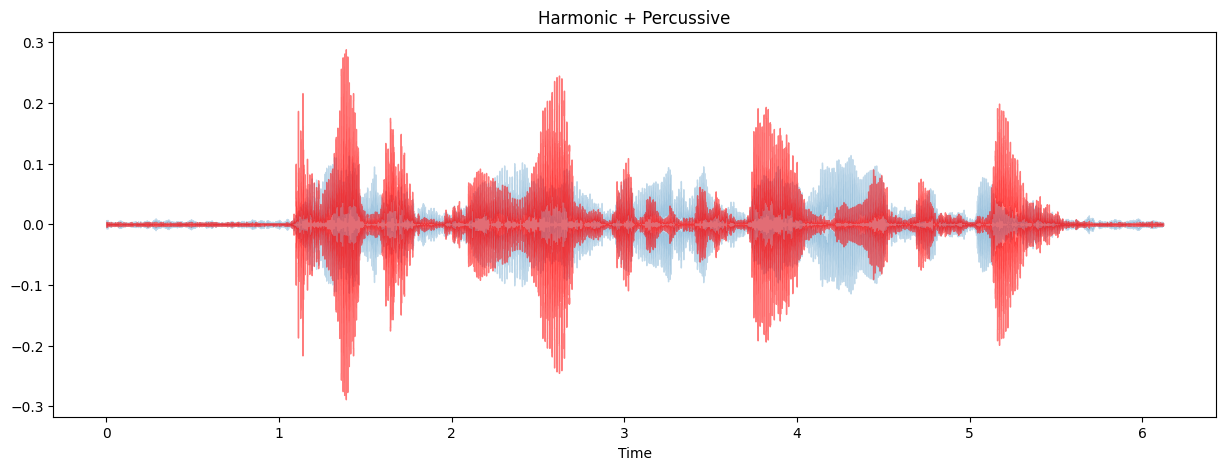

In [ ]:
# Seperation of Harmonic and Percussive Signals
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

Результатом является то, что временной ряд y был разделен на два временных ряда, содержащих гармоническую и перкуссионную части сигнала. Каждый из y_harmonic и y_percussive имеет ту же форму и продолжительность, что и y.

## Извлечение битов - Beat.

- Бит
Бит — это основная единица измерения ритма в музыке. Он представляет собой краткий, четкий звук или удар, который служит основой для создания ритмического рисунка. Биты могут быть слышны в ударных инструментах, таких как барабаны, и часто определяют пульсацию композиции. В большинстве музыкальных стилей биты группируются в такты.


- Такт
Такт — это более крупная единица измерения, которая состоит из определенного количества битов. Такт организует музыку в регулярные интервалы времени и помогает музыкантам и слушателям воспринимать ритм. Например, в 4/4 такте содержится четыре бита, а в 3/4 — три бита. Такты могут иметь различные размеры и могут быть обозначены различными временными подписями (например, 4/4, 3/4, 6/8 и т.д.).


- Связь между битом и тактом
Связь между битом и тактом заключается в том, что биты формируют основу для построения тактов. Каждый такт состоит из определенного количества битов, что позволяет организовать музыку в ритмическую структуру. Например:


- В такте 4/4 каждый такт содержит четыре бита.

- В такте 3/4 каждый такт содержит три бита.


Таким образом, понимание битов и тактов помогает музыкантам создавать ритмически сложные и организованные музыкальные произведения.

Detected Tempo: [117.45383523] beats/min


<ipython-input-12-3ecc603ae5cf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="BuGn_d", ax=ax)


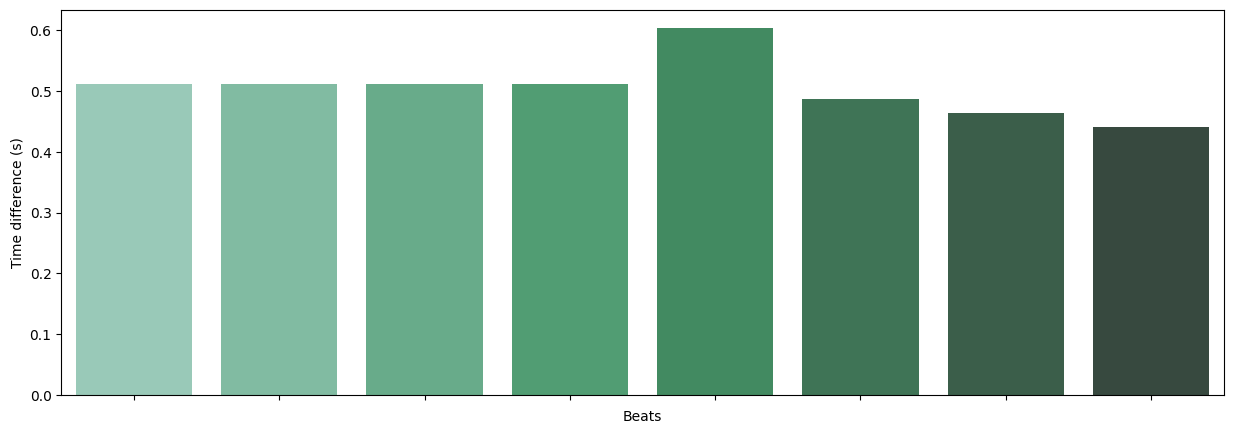

In [ ]:
# Beat Extraction
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
print('Detected Tempo: ' + str(tempo) + ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff = np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="BuGn_d", ax=ax)
g.set(xticklabels=[])
plt.show()

## Спектрограмма

Спектрограмма - это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах, присутствующих в форме волны. Обычно изображается в виде тепловой карты. .stft() преобразует данные в кратковременное преобразование Фурье.

С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.

На вертикальной оси показаны частоты (от 0 до 10 кГц), а на горизонтальной — время.

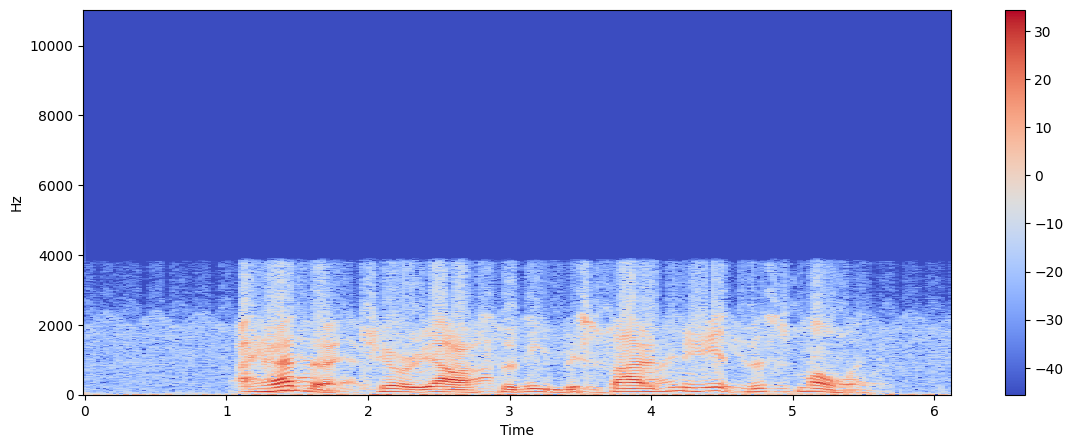

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

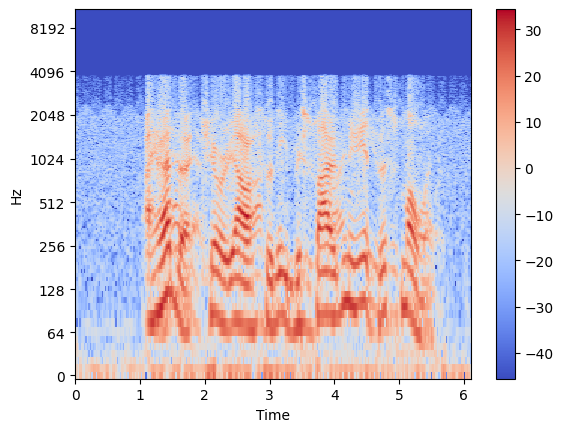

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

** Спектральные (частотные) признаки получаются путем преобразования временного сигнала в частотную область с помощью преобразования Фурье. К ним относятся частота основного тона, частотные компоненты, спектральный центроид, спектральный поток, спектральная плотность, спектральный спад и т.д.**

 Спектральные характеристики всех звуковых сигналов определяются с помощью двух зависимостей:

зависимость амплитуды от времени

зависимость амплитуды от частоты

### Chroma Energy Normalized (CENS)
— это метод представления музыкальных данных, который используется в области анализа музыки и обработки сигналов. Он основан на концепции хроматической шкалы, которая делит музыкальные ноты на 12 уникальных классов (или "хромов"), соответствующих нотам в октаве.

Метод учитывает энергию звуковых сигналов, что помогает оценить интенсивность звучания каждой ноты или аккорда в определенный момент времени.

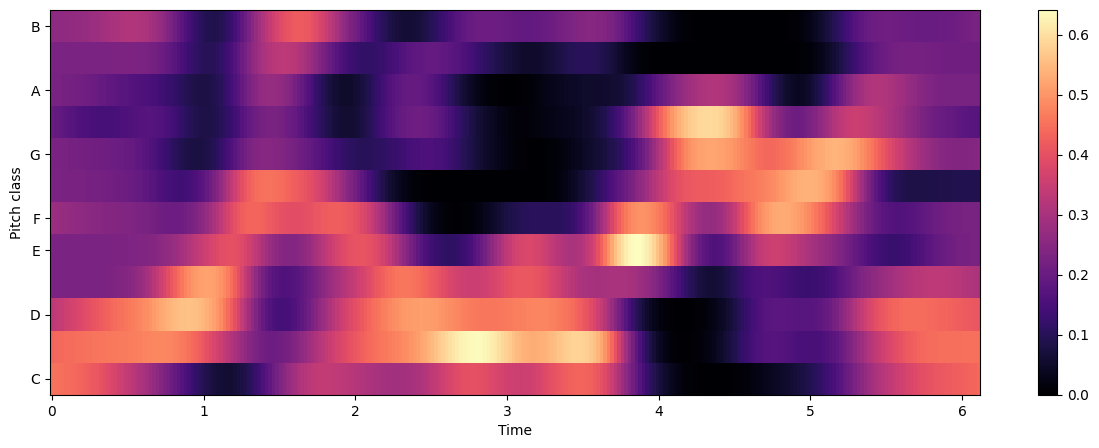

In [ ]:
#Chroma Energy Normalized (CENS)
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

### Мел-кепстральные коэффициенты (MFCC).

MFCC представляют собой параметры, которые описывают акустические характеристики звукового сигнала.

Представляют собой небольшой набор признаков (обычно около 10–20), которые кратко описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса.

В аудиотехнике кепстр мел-частоты (MFC) — это представление краткосрочного спектра мощности звука, основанное на линейном косинусном преобразовании логарифмической мощности. спектр по нелинейной меловой шкале частот.

в MFC полосы частот равномерно разнесены по мел-шкале, что более точно соответствует реакции слуховой системы человека. Это искажение частоты может обеспечить лучшее представление звука, например, при сжатии звука, что потенциально может уменьшить полосу пропускания передачи и требования к хранению аудиосигналов.

Text(0.5, 1.0, 'MFCC')

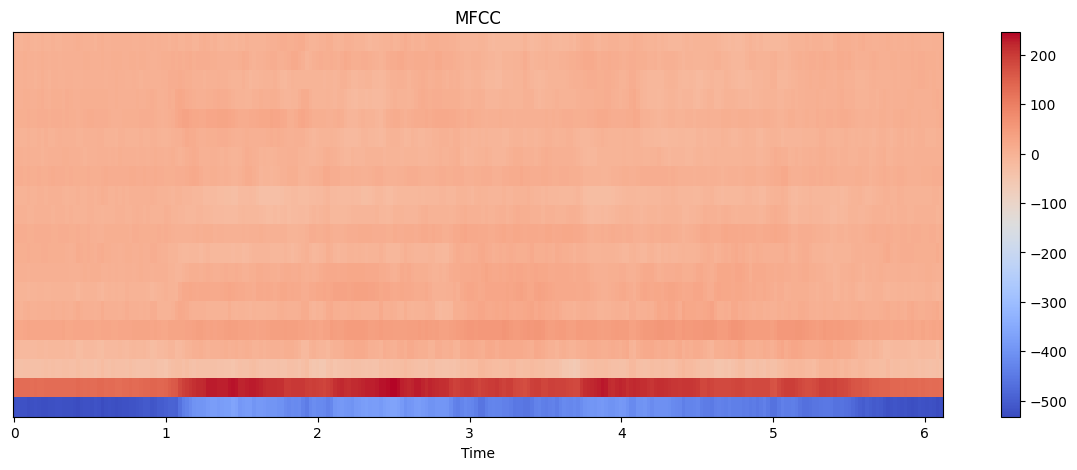

In [ ]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

### Спектральный центроид - Spectral Centroid.

Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука.

 Схож со средневзвешенным значением

 librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале

 Проще говоря, это говорит вам о яркости звука, которая во многих случаях может быть очень важным фактором

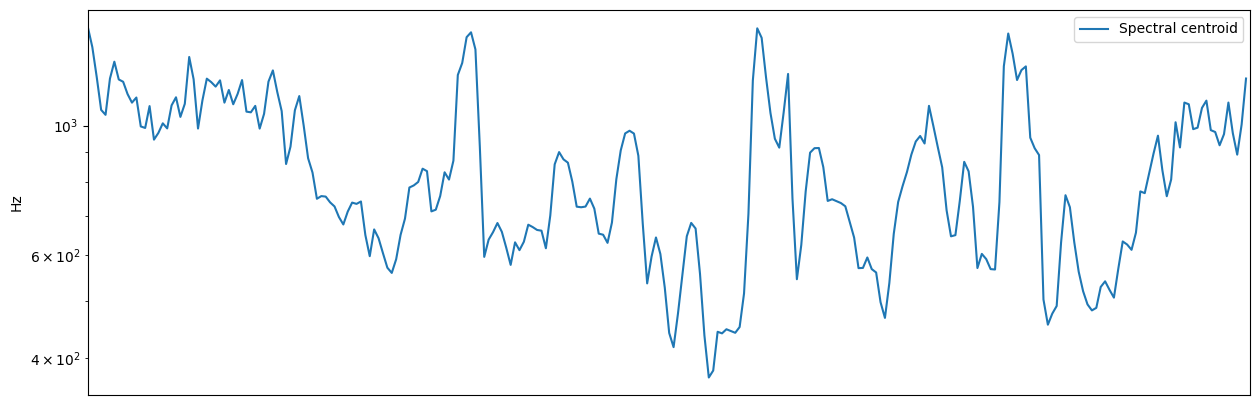

In [ ]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

Построение спектрального центроида вместе с формой волны:

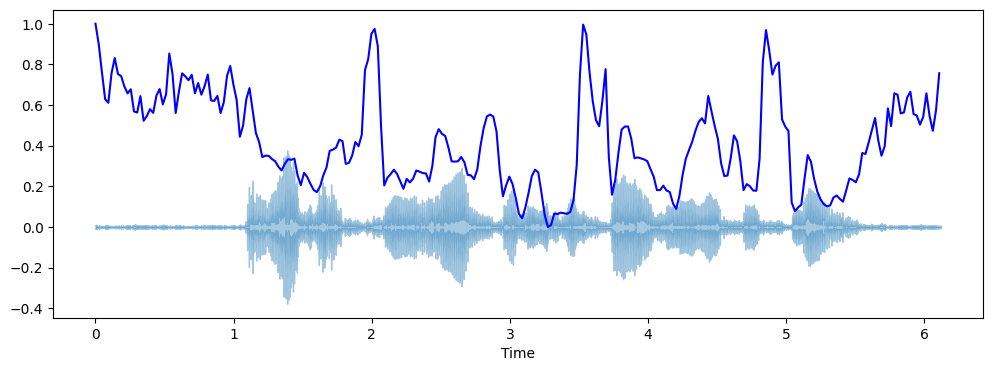

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y= y, sr=sr)[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y= y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

### Спектральный контраст - Spectral Contrast

Каждый кадр спектрограммы  S делится на поддиапазоны. Для каждого поддиапазона энергетический контраст оценивается путем сравнения средней энергии в верхнем квантиле (энергия пика) со средним значением энергии в нижнем квантиле (энергия впадины). Высокие значения контрастности обычно соответствуют четким узкополосным сигналам, а низкие значения контрастности соответствуют широкополосным шумам.

Text(0.5, 1.0, 'Spectral contrast')

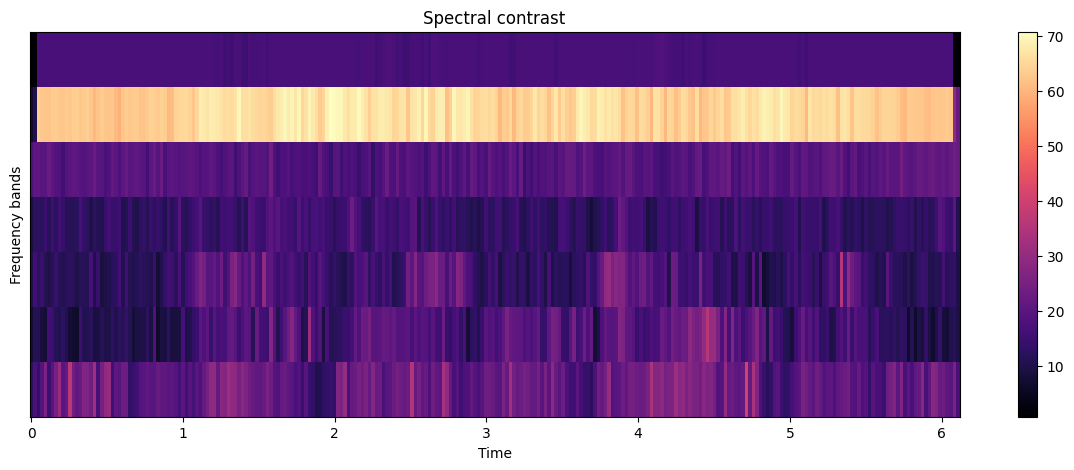

In [ ]:
# Spectral Contrast
contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

### Спектральный спад - Spectral Rolloff.

Это мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах. librosa.feature.spectral_rolloff вычисляет частоту спада для каждого фрейма в сигнале:

Частота спада определяется как частота, ниже которой содержится некоторый процент (отсечка) от общей энергии спектра. Частоту спада можно использовать для различения гармонических (ниже спада) и шумных звуков (выше спада).

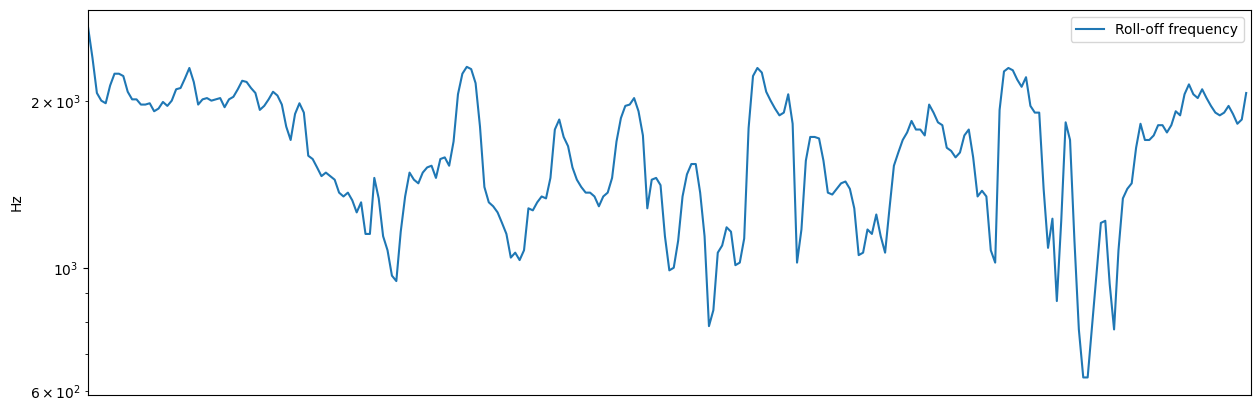

In [ ]:
# Spectral Rolloff
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

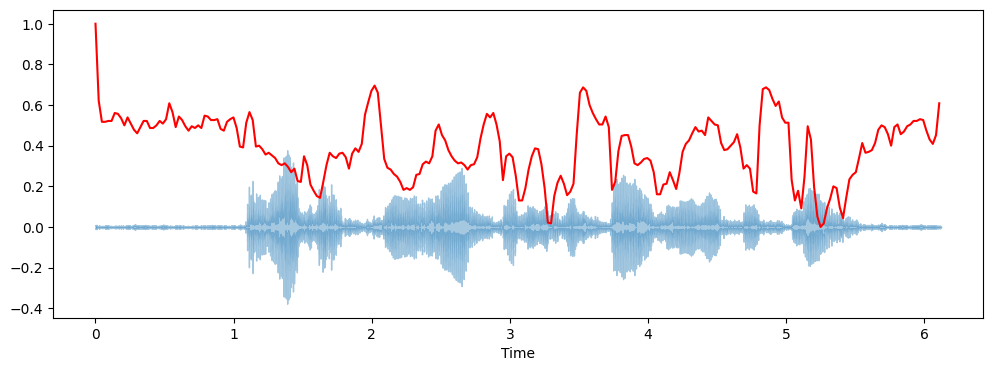

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y= y+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Скорость пересечения нуля - Zero Crossing Rate

Простой способ измерения гладкости сигнала — вычисление числа пересечений нуля в пределах сегмента этого сигнала. Голосовой сигнал колеблется медленно. Например, сигнал 100 Гц будет пересекать ноль 100 раз в секунду, тогда как “немой” фрикативный сигнал может иметь 3000 пересечений нуля в секунду.

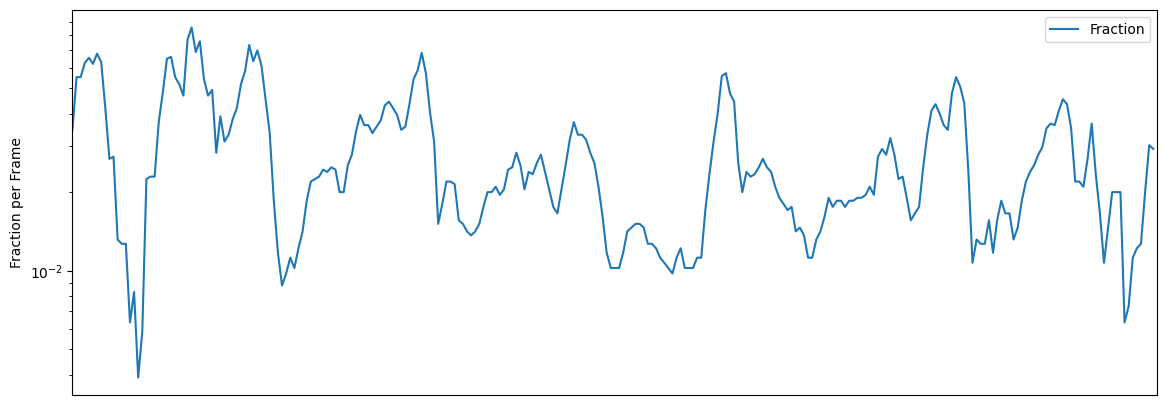

In [ ]:
# Zero Crossing Rate
zrate=librosa.feature.zero_crossing_rate(y_harmonic)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

### Спектральная ширина - Spectral bandwidth.

Спектральная ширина определяется как ширина полосы света на половине максимальной точки

Результат - полоса частот для каждого кадра

вычисляет спектральную ширину порядка p

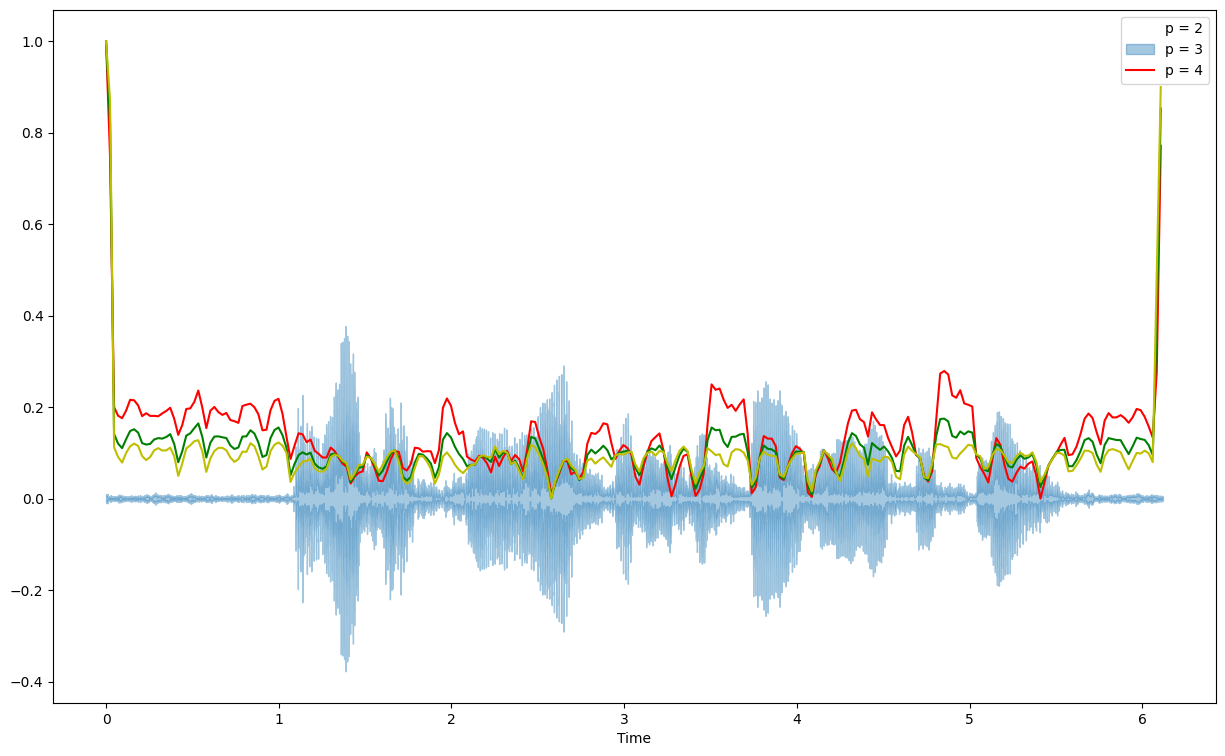

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Временные характеристики речи:

длительность звука речи (мс);

длительность пауз речи между словами (мс);

длительность пауз речи между фразами (мс);

скорость звуков речи (звуков/с);

темп речи (слов/мин);

плотность речи (%) – отношение времени наличия звука к полному времени речевого сигнала;

скорость изменения уровня громкости основного тона (дБ/с);

скорость изменения частоты основного тона (Гц/с).

### Загрузка данных с Гугл Диска

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls "/content/drive/My Drive"

 Bert_эмбеддинги_анализ.ipynb   Итоговая_Аттестационная_Работа_ДПО_Маяцкая_Е.А..pdf
'Colab Notebooks'	        Код
'Copy of МЧС.ipynb'	        Кортежи.ipynb
 documents.gdoc		        Множества.ipynb
 file_1.gdoc		        МЧС.ipynb
 file_2.gdoc		        Обучение_gpt.ipynb
 Untitled0.ipynb	        Отчет_ДПО_Маяцкая_Е.А..pdf
 Алгоритмы.ipynb	        Резюме_Маяцкая_Екатерина_Александровна.pdf
 Данные			        Словари.ipynb
 Задание_AI-ассистент.gdoc      Списки.ipynb


In [9]:
cd /content/drive/My Drive

/content/drive/My Drive


In [10]:
cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


### Длительность пауз речи

In [12]:
signal, sr = librosa.load('./data/training/real/file30106.wav_16k.wav_norm.wav_mono.wav_silence.wav', mono=True, duration=5)

# Установка порога (например, 0.01)
threshold = 0.01

# Получение индексов, где сигнал ниже порога
silent_indices = np.where(np.abs(signal) < threshold)[0]

# Находим разрывы между индексами тишины
silent_durations = []
if len(silent_indices) > 0:
    # Находим разницы между последовательными индексами
    silent_changes = np.diff(silent_indices)

    # Находим места, где тишина длится дольше определенного времени
    pause_indices = np.where(silent_changes > 1)[0] + 1

    # Добавляем первую и последнюю паузы
    pause_start = np.insert(silent_indices[pause_indices], 0, silent_indices[0])
    pause_end = np.append(silent_indices[pause_indices], silent_indices[-1])

    # Рассчитываем длительность пауз
    for start, end in zip(pause_start, pause_end):
        duration = (end - start) / sr  # Длительность в секундах
        silent_durations.append(duration)

# Выводим длительности пауз
print("Длительности пауз в секундах:", silent_durations)

Длительности пауз в секундах: [9.070294784580499e-05, 0.00031746031746031746, 0.00013605442176870748, 0.00022675736961451248, 9.070294784580499e-05, 9.070294784580499e-05, 0.00036281179138321996, 0.0004988662131519275, 0.00013605442176870748, 0.0008163265306122449, 0.0009070294784580499, 0.00013605442176870748, 0.00031746031746031746, 9.070294784580499e-05, 9.070294784580499e-05, 0.00040816326530612246, 0.00031746031746031746, 0.0010430839002267573, 0.00022675736961451248, 0.00036281179138321996, 0.0004988662131519275, 0.00013605442176870748, 0.00036281179138321996, 9.070294784580499e-05, 9.070294784580499e-05, 0.00013605442176870748, 9.070294784580499e-05, 9.070294784580499e-05, 0.00018140589569160998, 9.070294784580499e-05, 0.0005895691609977325, 0.00013605442176870748, 0.00027210884353741496, 0.00013605442176870748, 9.070294784580499e-05, 0.00013605442176870748, 0.00036281179138321996, 0.00036281179138321996, 0.00018140589569160998, 0.00013605442176870748, 0.00027210884353741496, 0.

In [5]:
pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 33.3 MB/s eta 0:00:00


### темп речи (слов/мин)

In [11]:
import speech_recognition as sr

# Загрузка аудиофайла
audio_file ='./data/training/real/file30106.wav_16k.wav_norm.wav_mono.wav_silence.wav'

# Распознавание речи
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
    try:
        # Используем Google Web Speech API для распознавания
        text = recognizer.recognize_google(audio_data)
    except sr.UnknownValueError:
        print("Не удалось распознать речь")
        text = ""
    except sr.RequestError:
        print("Ошибка запроса к сервису распознавания")
        text = ""

# Подсчет слов
word_count = len(text.split())

# Измерение длительности аудиофайла
signal, sr = librosa.load(audio_file, sr=None)
duration_minutes = librosa.get_duration(y=signal, sr=sr) / 60  # Время в минутах

# Расчет темпа речи (слов в минуту)
if duration_minutes > 0:
    speech_rate = word_count / duration_minutes
else:
    speech_rate = 0

print(f"Темп речи: {speech_rate:.2f} слов/мин")


Темп речи: 46.42 слов/мин


### плотность речи

In [13]:
def calculate_speech_density(audio_file):
    # Загружаем аудиофайл
    y, sr = librosa.load(audio_file, sr=None)

    # Определяем порог громкости для выделения речи
    threshold = 0.02  # Порог можно настроить в зависимости от качества записи

    # Вычисляем время наличия звука
    speech_time = np.sum(y > threshold) / sr  # Время в секундах

    # Полное время записи
    total_time = len(y) / sr  # Время в секундах

    # Вычисляем плотность речи
    if total_time == 0:
        return 0  # Избегаем деления на ноль

    speech_density = (speech_time / total_time) * 100
    return speech_density

# Пример использования
audio_file = './data/training/real/file30106.wav_16k.wav_norm.wav_mono.wav_silence.wav'
density = calculate_speech_density(audio_file)
print(f"Плотность речи: {density:.2f}%")


Плотность речи: 26.93%
